In [1]:
import sys
sys.path.insert(0, "/Users/do-hyungkwon/GoogleDrive/git/aiclass/1731095007_dohyungkwon/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
%matplotlib inline
# pip install pygraphviz

In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,# 값을 크게 준다는 것은 값들이 더 넓게 분포한다는 것을 의미. 0.1로 주면 수행 잘 안됨.
    # 왜 특정 초기값을 주어야 학습이 잘 이루어지는것인지 연구가 필요
    # 기준이 뚜렷하지 않음
    # /Users/do-hyungkwon/GoogleDrive/git/aiclass/0.Professor/tensorflux/main/vanilla_multi_layer_test
    # cost function을 벗어나거나 local optima에 빠지거나 하는 등.. 
    # 함수를 설계하기 나름 아닌가? 
    # 시각화할 수 있으면 도움이 좀 되나?
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [3]:
# pip install pygraphviz
# n.draw_and_show(figsize=(20, 10))

In [3]:
#data = mnist.MNIST_Data()
data = mnist.MNIST_Data()

In [4]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000 #1000장의 이미지를 뭉탱이로 준다.
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)#True

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x11211aef0>:
--%<-----------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/typeinfer.py", line 137, in propagate
    constraint(typeinfer)
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/typeinfer.py", line 190, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/contextlib.py", line 100, in __exit__
    self.gen.throw(type, value, traceback)
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/errors.py", line 265, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/six.py", line 658, in reraise
    raise value.with_traceback(tb)
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/Users/do-hyungkwon/anaconda/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
numba.errors.InternalError: 
[1] During: typing of argument at /Users/do-hyungkwon/GoogleDrive/git/aiclass/1731095007_dohyungkwon/tensorflux/layers.py (32)
--%<-----------------------------------------------------------------

File "../../layers.py", line 32

This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'tensorflux.layers.Affine'>


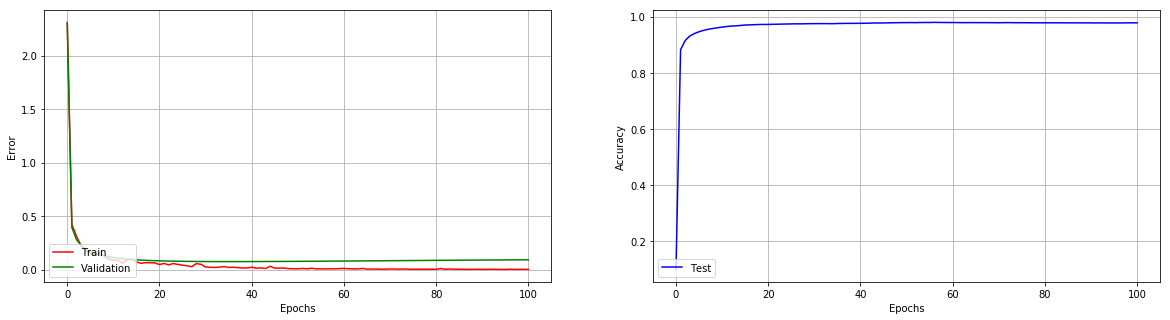

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

In [ ]:
# validation error가 최소일 때가 가장 좋은 모델이다
# 즉 epoch N번째에서 가장 낮은 validation error를 보이는 것이 가장 좋은 모델이다. 
# 즉 그 에폭에 해당하는 파라미터를 끄집어 와야 한다는 소리다.


# 따라서 위의 그래프에서는 초록색이 최저일 떄 끝났어야 함
# 따라서 에포크마다 파라미터를 저장할 필요가 있음

# 그럼, 왜 갑자기 error가 높아지는건가? 특히 Fashion MNIST에서.



False Prediction Index: 115, Prediction: Nine, Ground Truth: Four
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 259, Prediction: Zero, Ground Truth: Six
False Prediction Index: 321, Prediction: Seven, Ground Truth: Two
False Prediction Index: 340, Prediction: Three, Ground Truth: Five


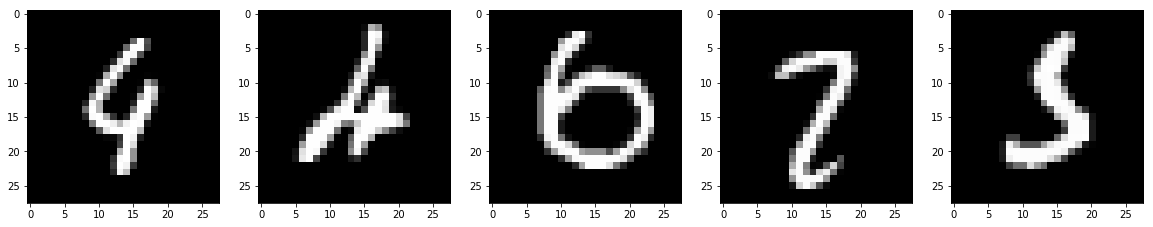

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))
# cost-learning Accuracy 0.9783
# 틀린 217개 중 다섯개의 이미지 출력

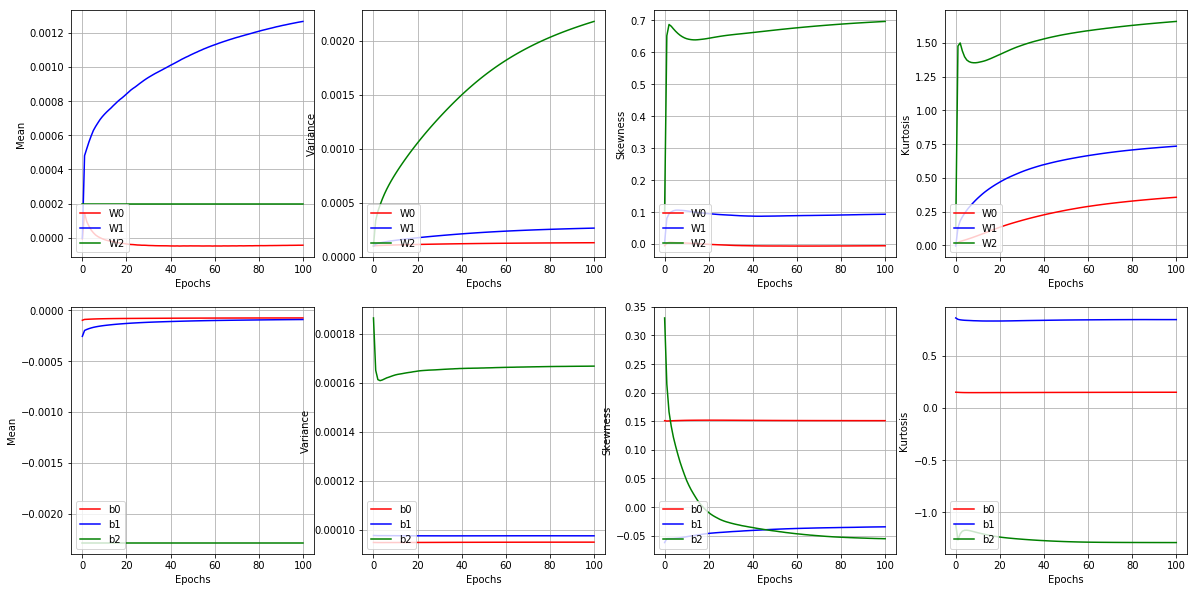

In [8]:
n.draw_param_description(figsize=(20, 10))